In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
%matplotlib inline


In [28]:
df1=pd.read_csv("E:\kaggle\Womens Clothing E-Commerce Reviews.csv\Womens Clothing E-Commerce Reviews.csv")
df = df1[['Review Text', 'Rating', 'Class Name']]

In [29]:
df['Review Text']=df['Review Text'].fillna('')
vectorizer=CountVectorizer()
analyzer=vectorizer.build_analyzer()

c:\users\spundir\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
def WordCounts(s):
    c={}
    if analyzer(s):
        d={}
        w=vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return  c

df['Word Counts'] = df['Review Text'].apply(WordCounts)
df.head()

c:\users\spundir\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Review Text,Rating,Class Name,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64
   index  Rating
0      5   13131
1      4    5077
2      3    2871
3      2    1565
4      1     842


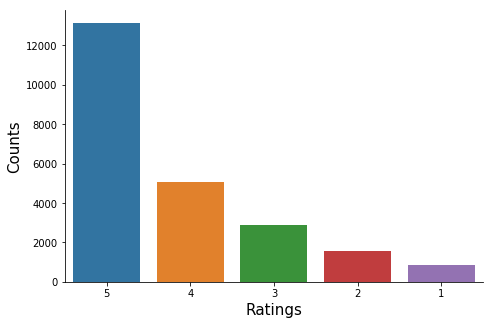

In [31]:
df1=df['Rating'].value_counts()
print(df1)
df2 = df1.reset_index()
print(df2)
f, axes = plt.subplots(1, 1,figsize=(7.5,5))
sns.barplot(x=df2['index'],y=df2['Rating'], ax=axes, order=df2['index'])

axes.set_ylabel('Counts',fontsize=15)    
axes.set_xlabel('Ratings',fontsize=15)

sns.despine(right=True, top=True)

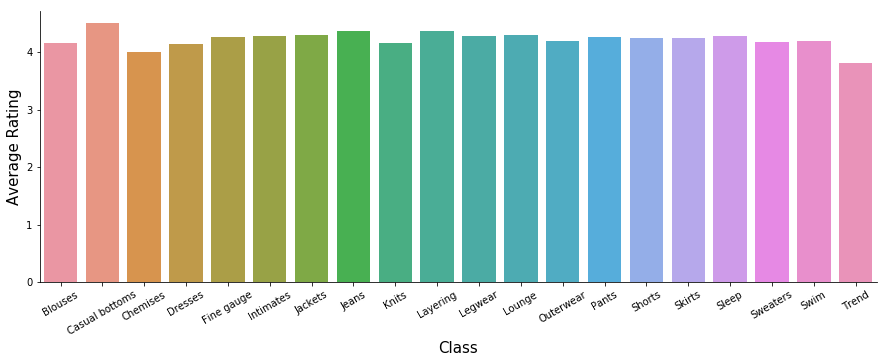

In [32]:
avgdf=df.groupby('Class Name').agg({'Rating':np.average})
avgdf = avgdf.reset_index()

f, axes = plt.subplots(1, 1,figsize=(15,5))
p = sns.barplot(x=avgdf['Class Name'],y=avgdf['Rating'], ax=axes, order=avgdf['Class Name'].values)
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)

axes.set_ylabel('Average Rating',fontsize=15)    
axes.set_xlabel('Class',fontsize=15)
sns.despine(right=True, top=True)

In [35]:
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

,Review Text,Rating,Class Name,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [42]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X = vectorizer.fit_transform(train_data['Review Text'])
y = train_data['Sentiment']
print(X.data)

c:\users\spundir\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[1 1 2 ..., 2 4 1]


In [43]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
nb = MultinomialNB()
nb.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
df1=pd.DataFrame({'Logistic Regression':lr.predict_proba(X)[:,1], 'Naive Bayes':nb.predict_proba(X)[:,1]})
df['Logistic Regression']=df1['Logistic Regression']
df['Naive Bayes']=df1['Naive Bayes']
df.head()
df[pd.isna(df['Naive Bayes'])].count()

Review Text            6135
Rating                 6135
Class Name             6128
Word Counts            6135
Sentiment              6135
Logistic Regression       0
Naive Bayes               0
dtype: int64

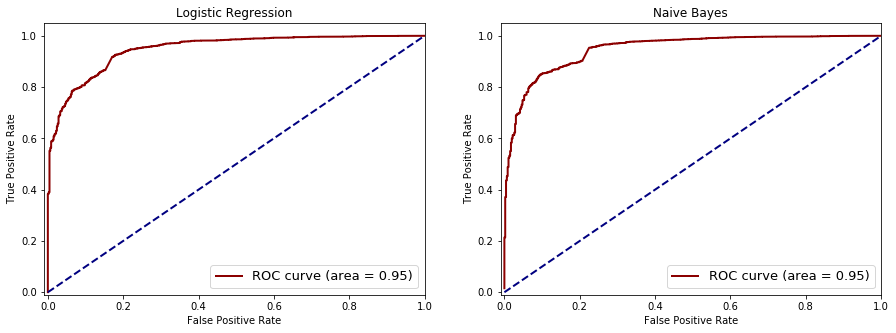

In [52]:
pred_lr = lr.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_lr,tpr_lr,_ = roc_curve(test_data['Sentiment'].values,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(vectorizer.transform(test_data['Review Text']))[:,1]
fpr_nb,tpr_nb,_ = roc_curve(test_data['Sentiment'].values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

f, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0].legend(loc='lower right', fontsize=13)

axes[1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[1].legend(loc='lower right', fontsize=13)